# Data science in Python - I. - Problems in data science

<img src="./images/datasci.png" style="display:block; margin:auto;"/>

## Glossary

<p style="font-size:16px;">
Data science primarily deals with datasets (surpire-surpire). There are some related terms that are used extensively in any topic related to this field of science. It is advised to be familiar with all of them before venturing into this vast field. Below is a short list of the most important terms. A short description is also attached to all of them.
</p>

<ul style="font-size:16px;">
<li><b>Dataset (<i>hu: adathalmaz</i>)</b>: An ensemble of datapoints. Denoted by upper case <code>X</code> by convention. Datasets can be (and most of the time is) multidimensional, which means the <code>x</code> (lower case) datapoints consist of more, than one components. In this case, datapoints can be considered to be "vectors", or at least a list of continuous/discrete/non-numeric values. It is also a common convention that in a table, rows denote the individual datapoints, while columns denote the different dimensions/components of datapoints.</li>

<li><b>Labels (<i>hu: címke</i>)</b>: Some datasets are not solely consists of the datapoints themeselves, but corresponding <b>labels</b> too. In normal cicumstances, every <code>x</code> datapoint has a corresponding <code>y</code> value. The list of labels are denoted by lower case <code>y</code> by convention.</li>

<li><b>Features (<i>no hu translation</i>)</b>: Another name for the different dimensions of an <code>X</code> dataset. This is the term that is primarily used for dataset dimensions in data science. In practice, most of the "features" represent an actual, measurable quantity.</li>

<li><b>Class (<i>hu: osztály</i>)</b>: In classifications problems, labels are discrete, which represent that every datapoint can be "classified" into a specific subset of the dataset. The interpretation of subsets can be arbitrary. They could simply represent "bins" or "intervals", in which the labels are "binned to" by value. Or they could be more meaningful. Eg. if the datapoints are images, labels could represent, whether there is a dog or a cat on the image.</li>

<li><b>Model (<i>same in magyar with double 'L'</i>)</b>: A "model" in data science has obviously a very similar meaning as in other fields of science. It means to represent some underlying connection between datapoins or between datapoints and labels in a dataset. In the context of modern data science, "model" represent an arbitrary mathematical operator or sequence of operators, that maps the <code>X</code> dataset to corresponding <code>y</code> values.</li>

<li><b>Training/Learning (<i>hu: tanulás/tanítás</i>)</b>: This is just a fancy and generalized way of saying "fitting data on a model". In numerous cases "fitting data" is not just a simple curve fitting, but a much more complex process that is harder to interpret. Also most machine learning methods work in a way, where they're optimizing model parameters during an iterative process. This can be well described by the terms "training" and "learning". Models are essentially "trained" over iterations, as they're "learning" the underlying correlation in the dataset.</li>

<li><b>Supervised vs. unsupervised learning (<i>hu: felügyelt-/felügyelet nélküli tanítás/tanulás</i>)</b> : It means whether we're using data with or without labels. If labels are attached to a dataset during training/learning, we're speaking about <b>supervised learning</b>, while if no labels are attached to our dataset, we're speaking about <b>unsupervised learning</b>.</li>
</ul>

# Types of problems

Overwhelming majority of the problems in data science can be classified into 3 groups: regression, classification and clustering.

<img width="700px" src="./images/three-pillars.png" style="display:block; margin:auto;"/>
<p style="text-align:center; font-size:24px;">
  <b>Fig. 1. The three pillars of data science</b>
</p>
<p style="text-align:center; font-size:12px;">
  <b>Source: <a href="https://www.researchgate.net/figure/The-three-pillars-of-learning-in-data-science-clustering-flat-or-hierarchical_fig1_314626729">https://www.researchgate.net/figure/The-three-pillars-of-learning-in-data-science-clustering-flat-or-hierarchical_fig1_314626729</a></b>
</p>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Scikit-learn, tensorflow, torch, etc.
#import torch
#import tensorflow as tf

from sklearn.datasets import make_regression, make_classification, \
                             make_blobs, make_moons, make_circles
# ...
# ...

## 1. Regression

<p style="text-align:center; font-size:20px;">
  <b>Data and label -> Model -> Continuous value</b>
</p>

### Data

In [5]:
X, y = make_regression(
    n_samples=1000,
    n_features=100,
    n_informative=10,
    n_targets=1,
    random_state=57
)

In [3]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.019372,-0.117767,0.438101,-0.810123,-0.726345,-1.136266,-0.242097,0.652329,0.748990,1.637886,...,0.265175,-0.744128,0.946096,1.805179,0.178859,-0.735191,-0.747147,-2.179583,-1.653891,-1.013492
1,-0.605681,0.438800,1.323485,0.747959,-0.759494,1.675496,-1.483006,0.624599,0.617379,0.986203,...,0.145591,-0.666973,-0.473790,-0.557825,1.709762,0.909442,-0.714381,-1.370099,1.371297,-0.813015
2,-1.071459,1.445631,1.268772,-2.328372,0.286065,0.237735,1.183015,1.727733,0.533487,1.067902,...,0.633747,-0.943095,0.999774,-0.553801,1.808250,0.785866,0.356395,1.043275,-0.582326,-0.274621
3,-1.423409,0.137096,2.337184,-2.069028,-1.694182,1.050481,-0.073803,-1.182147,-0.281695,0.302872,...,0.301853,0.890060,0.629345,0.583872,-1.038395,1.453374,0.900404,2.099050,0.175843,-0.513056
4,0.046095,0.358625,0.804881,1.986806,0.877047,1.289079,0.211540,0.337862,0.464779,-1.518764,...,-1.188519,1.107363,1.100196,-1.895374,1.443624,-0.828042,-1.163829,0.440607,1.162612,0.550362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.761576,0.320131,-0.648587,-0.120342,-1.082465,-0.871033,1.677454,-1.175239,-0.783220,-0.381770,...,-0.482940,0.296617,-0.034377,-0.103742,0.637297,2.298466,0.507761,0.727158,0.363996,-0.250349
996,1.118442,-0.250572,-1.821241,0.692386,-0.567012,0.234701,-0.463539,0.476740,0.647376,-1.007317,...,0.481285,1.263587,-2.540068,0.561228,-1.905656,0.552146,0.691426,-1.137240,-1.459315,1.263573
997,-0.067320,-0.860013,-0.486206,-0.840882,-2.298544,-0.943067,0.202747,-0.667668,-0.284204,-1.207001,...,1.793968,1.298452,0.550710,0.206199,0.769329,-1.407952,-1.006964,-0.443692,1.022426,-0.620790
998,-1.137306,0.133334,-0.438431,0.479807,0.461991,-0.601138,-1.340520,0.228628,-1.957730,-0.877373,...,-0.391032,-0.014172,-1.269748,1.258477,0.543734,-0.882203,-1.764756,-0.658528,0.898406,-1.712435


### Labels

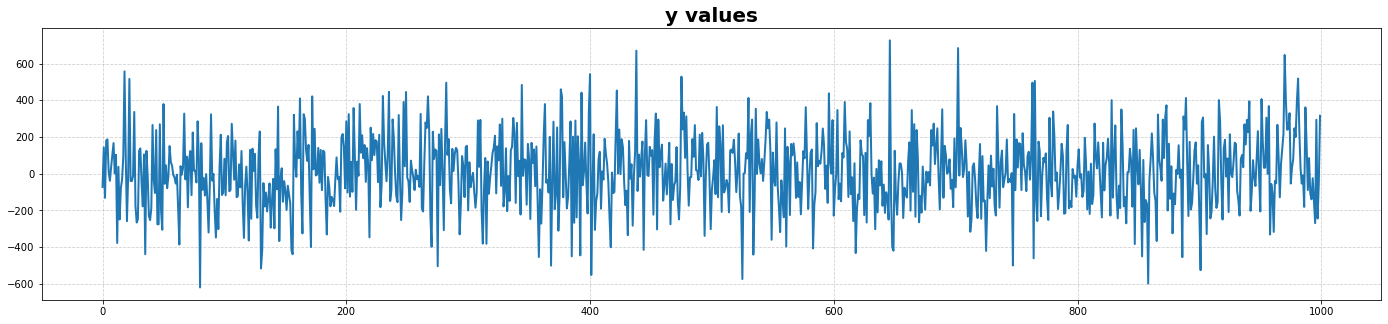

In [4]:
fig, ax = plt.subplots(figsize=(24, 5))
ax.grid(True, ls='--', alpha=0.6)

ax.plot(y, lw=2)

ax.set_title("y values",
             fontsize=20, fontweight='bold')

plt.show()

## 2. Classification

<p style="text-align:center; font-size:20px;">
  <b>Data and label -> Model -> Discrete value</b>
</p>

### Data

In [5]:
X, y = make_classification(
    n_samples=1000,
    n_features=100,
    n_informative=10,
    n_redundant=0,
    n_classes=3
)

In [6]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.874410,0.910508,2.312502,1.375341,0.880184,1.673437,-0.733669,-0.099083,-1.047038,-0.392844,...,2.452773,-0.693427,-0.306088,-1.750326,-0.023504,-0.263624,-1.737200,1.153024,-0.237057,0.527894
1,-2.074485,1.093709,-2.261352,-1.067995,1.512723,-1.647592,-0.955011,-0.190562,-0.894823,-0.286205,...,0.370185,0.068297,-0.425338,0.090363,1.245138,-2.590723,0.024866,-1.078443,-0.204494,-0.679098
2,0.084855,1.843019,2.203627,-0.997922,1.269909,-0.226435,1.061281,-0.392496,-1.623471,-0.456979,...,1.811177,-0.545829,-1.260084,-2.400671,-0.067990,0.216747,-2.343526,0.068506,-0.885032,1.847275
3,0.127838,0.635809,1.062205,1.564018,-0.711462,-0.551518,-0.527643,-0.629396,-0.248552,-0.154466,...,-3.117706,0.320466,0.235205,0.913988,-1.524445,-1.090083,-0.178839,0.900675,-1.216749,-1.397127
4,-0.830609,-0.790390,-0.776126,0.113518,1.802423,-1.413657,-0.083865,-0.889054,0.783683,0.300091,...,-0.497094,0.505843,1.583854,-0.000633,-0.882798,0.924437,-1.225720,0.038993,-0.024431,1.665326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.150998,-1.394441,2.045511,-0.086984,1.910959,2.188792,-0.828475,-0.235419,1.381894,0.600146,...,-1.925988,0.490879,-0.815308,1.195458,-0.542184,0.836187,1.074192,0.008776,0.889335,-0.322758
996,-0.998350,0.374001,-0.114702,0.074119,-2.691714,0.536657,2.022739,0.273080,1.102409,0.520305,...,-2.719047,-2.246163,1.655229,0.544080,-0.521193,0.196423,-1.357408,-1.750510,-1.182600,0.836501
997,0.813177,1.024106,0.841582,1.171607,-0.260101,1.096799,-0.066168,2.933949,0.615627,0.167826,...,-0.436952,0.226725,-0.305611,1.527627,-0.696000,-0.668020,-0.723993,0.855803,-0.592378,-0.860637
998,-0.293481,-1.167632,0.286234,0.499793,1.110405,0.146890,1.480153,0.038690,-0.590299,-0.265911,...,-0.132291,-0.177618,-0.280908,0.309652,-0.859539,-0.609913,-1.108329,-0.585072,2.149282,-0.897255


### Labels

In [7]:
s = ''
for i in y: s += f'{i} '
print(s)

2 1 0 0 0 2 0 0 2 2 0 2 1 2 0 2 1 1 2 1 1 2 2 2 0 2 0 1 2 0 0 2 0 2 1 0 2 1 2 2 1 1 2 2 1 2 2 1 2 0 1 2 0 0 0 0 1 0 2 1 0 0 0 0 1 0 0 2 1 1 0 0 0 0 1 2 0 2 1 1 1 0 2 0 2 1 2 0 1 1 0 0 0 2 2 1 2 0 1 1 2 2 0 0 0 2 1 0 0 1 2 1 2 0 0 2 0 1 0 1 2 1 1 1 2 1 0 1 0 2 2 2 2 1 1 2 2 2 2 2 1 2 2 2 1 0 2 0 2 0 1 0 2 1 0 0 2 0 0 1 0 1 0 2 2 0 0 1 0 0 2 2 1 2 0 2 0 1 0 2 0 0 0 1 1 0 2 0 1 2 2 0 1 1 1 1 1 0 1 1 1 1 0 0 2 1 1 1 1 0 2 0 1 0 2 1 1 0 1 2 0 1 0 1 1 1 0 1 1 2 0 1 2 0 2 1 1 2 1 0 1 0 1 1 2 0 2 0 2 0 1 1 1 0 2 2 0 0 2 1 0 1 0 1 1 2 0 1 2 1 1 2 1 2 2 1 1 0 2 0 0 2 2 1 2 2 2 2 2 0 2 2 0 0 1 0 2 2 0 2 1 1 1 1 0 2 1 1 1 2 0 0 1 1 0 0 1 0 2 1 2 2 0 0 0 0 2 2 0 1 1 2 0 2 2 1 1 0 2 2 0 1 1 1 1 1 0 0 2 2 1 0 2 0 2 1 0 1 0 1 1 2 2 0 2 0 0 2 1 2 0 2 2 2 1 1 0 1 2 1 2 0 0 2 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 2 0 0 2 0 2 0 0 0 1 0 0 1 0 1 2 1 0 2 2 2 1 0 0 2 1 0 0 1 2 2 1 1 2 1 2 1 0 1 2 2 0 2 0 1 2 2 2 2 1 2 2 1 0 1 2 2 1 1 2 2 1 0 2 0 1 2 0 0 0 2 0 1 0 2 1 2 0 1 0 2 1 1 0 2 2 1 2 2 1 2 1 2 2 2 1 0 

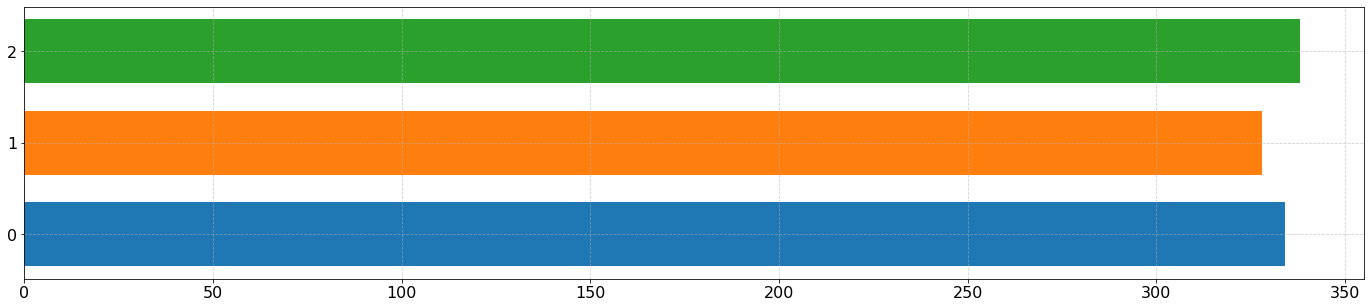

In [8]:
fig, ax = plt.subplots(figsize=(24, 5))
ax.grid(True, ls='--', alpha=0.6)

ax.barh(*np.unique(y, return_counts=True), height=0.7,
        color=cm.tab10(np.unique(y)))

ax.set_yticks(np.unique(y))
ax.set_yticklabels(np.unique(y))

ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

## 3. Clustering

<p style="text-align:center; font-size:20px;">
  <b>Only data -> Model -> Discrete value</b>
</p>

### Data

In [24]:
N = 1500
# Create a dummy dataset of blobs
Xb, yb = make_blobs(
    n_samples=N,    # Number of points in the dataset
    n_features=2,   # Dimension of the dataset (Here it's a 2D dataset)
    centers=3,      # Number of blobs to create
    cluster_std=[1.0, 2.5, 0.5],
    center_box=(-10, 10),
    random_state=57
)

# Create a dummy dataset of circles
Xc, yc = make_circles(
    n_samples=N,    # Number of points in the dataset
    noise=0.05,
    factor=0.6,
    random_state=57
)

# Create a dummy dataset of moons
Xm, ym = make_moons(
    n_samples=N,    # Number of points in the dataset
    noise=0.05,
    random_state=57
)

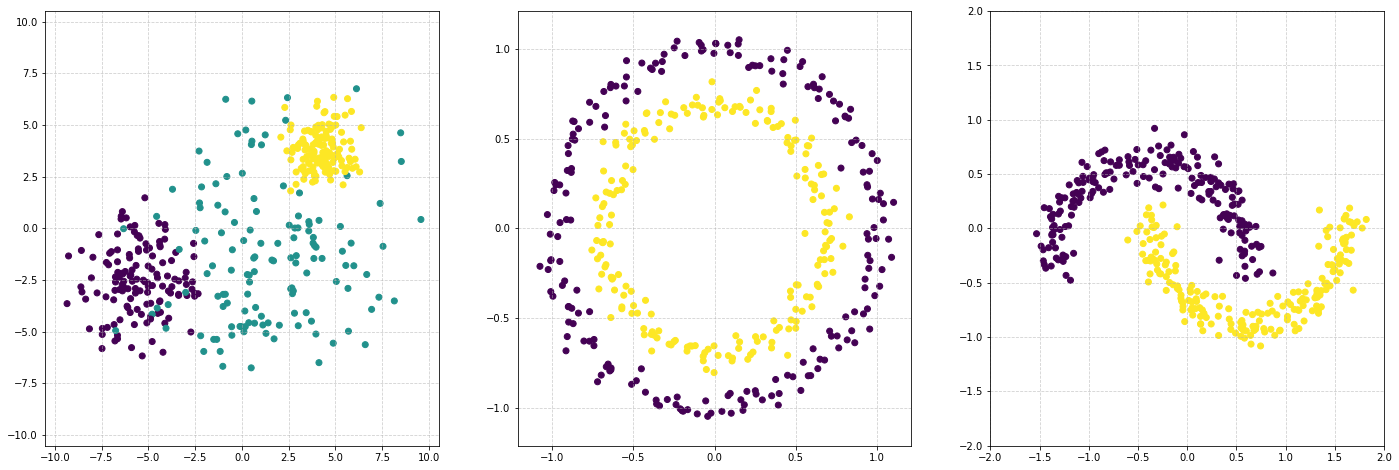

In [25]:
# Visualize them
nr, nc = 1, 3
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(8*nc, 8*nr))

Xi = (Xb, Xc, Xm)
yi = (yb, yc, ym)
for X, y, ax in zip(Xi, yi, axes.flat):
  ax.grid(True, ls='--', alpha=0.6)
  
  X = X - np.mean(X)
  ax.scatter(*X.T, c=y)
  
  lim = 1.1 * np.max(np.abs(X))
  ax.set_xlim(-lim, lim)
  ax.set_ylim(-lim, lim)
  
plt.show()

### Let's have a look at the first one...

In [8]:
# Create a dummy dataset of blobs
Xb, yb = make_blobs(
    n_samples=1000,  # Number of points in the dataset
    n_features=100,  # Dimension of the dataset (Here it's 100D)
    centers=3,       # Number of blobs to create
    cluster_std=1.5,
    center_box=(-10, 10),
    random_state=57
)

In [9]:
pd.DataFrame(Xb)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-9.693615,-6.719092,-2.686879,-3.234034,2.425982,1.175244,4.723680,8.372688,-0.745291,-1.894604,...,8.143203,-1.324971,-6.129711,-0.585828,0.853682,5.988619,4.514358,3.497389,-1.411547,4.169881
1,-4.347718,-7.323542,-5.645974,-1.817607,-9.268256,1.915952,7.851998,-0.842079,-0.477088,7.217486,...,5.539149,11.208054,8.056669,3.430817,4.769587,-2.004099,-5.060451,-1.379744,4.713766,2.268345
2,-6.617521,-6.944107,-6.710802,-3.370262,-10.337536,-1.810230,5.642528,-0.174698,-0.250145,5.740201,...,6.531087,8.616793,7.778762,4.189411,4.533828,-0.776277,-10.137126,-4.575558,6.594454,5.120181
3,-8.011686,-3.676097,-0.752939,-2.393010,-0.361951,3.250407,6.162426,8.039611,1.101441,-2.432629,...,9.746442,-1.885028,-5.626744,-1.423803,0.329944,7.523437,8.724031,1.005601,1.674554,5.553622
4,-5.775302,-10.644864,-6.157005,-5.238450,-10.064327,0.556654,4.701484,0.494385,-0.989000,10.607060,...,4.524995,11.334696,9.191078,4.504997,6.093022,-2.418594,-6.184040,-1.581240,3.222036,4.198521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-9.027292,-3.050802,-2.702502,-5.338724,0.024536,3.169394,6.211510,9.931489,2.024174,-1.630860,...,9.294770,-0.126699,-6.481605,-5.845992,0.956611,8.051490,9.310979,3.016985,-2.279891,7.440467
996,-8.924732,-7.212214,-2.441711,-2.169978,1.569444,1.662898,6.355891,10.166459,-0.492852,1.372639,...,5.800691,-2.473232,-6.651511,-2.460889,-2.130800,2.038995,8.390282,1.658488,0.591362,4.874933
997,7.248146,-6.902454,3.261125,0.642397,-2.470575,-5.292369,5.554511,-5.100529,-0.746130,4.805584,...,9.891813,-10.207664,-4.464062,-3.563987,1.805376,-2.584726,-0.472466,-1.907697,-4.270636,-2.038272
998,-8.420863,-3.659788,-0.406790,-3.157048,2.466114,1.908167,5.758114,7.999780,0.836318,-2.801165,...,8.356155,-2.074476,-4.798652,-3.972147,0.350383,6.931447,5.731888,1.951580,-1.382516,5.075896


### Labels

In [10]:
s = ''
for i in yb: s += f'{i} '
print(s)

0 2 2 0 2 0 1 1 1 2 0 0 1 0 1 0 0 1 1 0 2 2 0 2 2 1 0 1 2 2 0 1 2 1 0 0 1 0 0 0 2 0 1 1 0 2 2 0 1 0 2 0 2 0 0 1 2 0 1 1 0 0 0 2 2 0 1 1 1 2 1 1 0 2 2 0 2 0 1 0 0 2 2 1 2 2 1 0 1 0 2 1 2 1 1 0 1 0 2 2 0 2 1 2 1 0 0 2 0 1 0 1 0 1 1 2 1 0 0 0 1 2 0 2 0 2 2 1 0 0 1 0 1 2 1 1 0 0 0 1 1 2 0 0 1 0 2 1 1 0 1 2 1 0 0 2 2 0 2 0 0 2 1 0 0 2 0 1 1 2 1 0 0 0 0 1 0 2 1 1 2 0 1 1 1 1 0 0 1 1 1 1 1 2 0 0 2 1 2 2 2 1 1 1 2 2 2 0 1 0 1 2 2 0 1 1 2 1 1 2 2 1 2 1 2 0 0 0 1 0 2 2 2 2 1 0 1 0 2 1 1 0 1 0 1 0 1 0 1 0 2 0 2 0 0 2 1 2 2 0 1 2 1 0 0 2 1 2 0 2 1 1 2 0 2 0 2 1 0 2 0 0 2 1 2 1 0 1 2 2 1 0 1 1 1 2 0 0 0 0 2 1 0 0 2 0 2 2 2 1 1 2 1 2 0 2 1 0 1 2 0 0 2 1 0 2 0 2 1 2 1 1 0 2 2 2 0 2 0 1 2 0 0 2 2 0 1 2 0 0 1 2 0 1 0 2 1 1 1 0 1 0 2 0 1 0 2 2 2 1 2 1 1 2 1 0 0 1 0 2 1 0 1 1 1 1 2 0 2 2 0 2 2 2 1 0 1 1 2 1 2 1 2 1 1 1 2 1 0 2 2 1 2 0 2 0 1 0 1 2 0 0 2 0 1 1 2 1 2 0 2 0 0 2 2 1 1 1 1 1 2 2 1 1 1 2 2 1 0 1 1 0 1 2 0 0 1 0 1 0 1 0 0 1 2 2 1 1 2 0 1 2 1 1 0 1 1 1 0 0 1 1 1 1 1 1 2 2 1 2 2 0 2 0 0 1 0 0 0 1 

## Examples

### Image processing

If we consider images as **datapoints** (**rows**) in a dataset, then pixels of images can be considered as individual *features* (*columns*) of this dataset.

#### Subaru Telescope images with spectro-Z data from SDSS

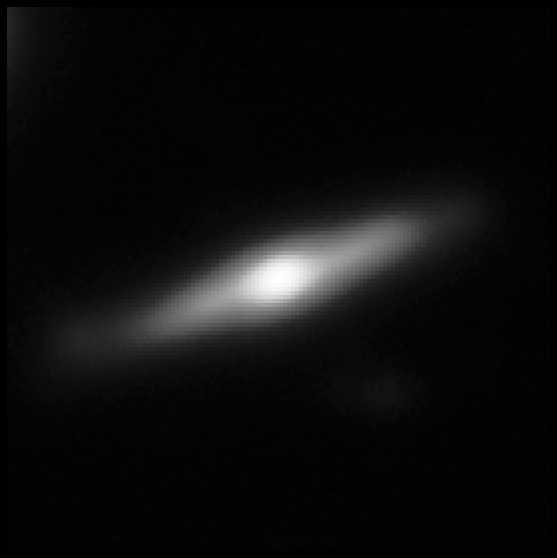

img.shape = (136, 136)
num of pixels = 18496
Redshift is z = 0.132621


In [13]:
f = "260_z0.132621.png"
img = plt.imread(f'./data/{f}')[:,:,0]

fig, ax = plt.subplots(figsize=(10, 10),
                       facecolor='black')
ax.axis('off')
ax.imshow(img, cmap="Greys_r")
plt.show()
print(f"{img.shape = }")
print(f"num of pixels = {img.size}")
print(f"Redshift is z = {f.split('z')[-1].split('.png')[0]}")

#### Now let's imagine a whole dataset of images like this...

In [15]:
import os

In [16]:
DDIR = '/home/masterdesky/data/Subaru/'
files = np.array([os.path.join(DDIR, f) for f in os.listdir(DDIR)])
X = np.array([plt.imread(f)[:,:,0].flatten() for f in files])
X = pd.DataFrame(X)

In [17]:
X

,0,1,2,3,4,5,6,7,8,9,...,18486,18487,18488,18489,18490,18491,18492,18493,18494,18495
0,0.603922,0.623529,0.600000,0.768627,0.576471,0.686275,0.458824,0.588235,0.658824,0.615686,...,0.423529,0.611765,0.576471,0.568627,0.686275,0.568627,0.501961,0.447059,0.490196,0.419608
1,0.070588,0.070588,0.090196,0.062745,0.070588,0.090196,0.090196,0.121569,0.117647,0.121569,...,0.592157,0.584314,0.588235,0.568627,0.568627,0.529412,0.513726,0.454902,0.431373,0.411765
2,0.011765,0.003922,0.011765,0.003922,0.007843,0.007843,0.007843,0.003922,0.007843,0.000000,...,0.003922,0.007843,0.007843,0.003922,0.007843,0.003922,0.011765,0.007843,0.000000,0.003922
3,0.007843,0.003922,0.003922,0.011765,0.003922,0.007843,0.003922,0.007843,0.007843,0.003922,...,0.011765,0.007843,0.007843,0.007843,0.007843,0.003922,0.003922,0.003922,0.007843,0.007843
4,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,...,0.000000,0.003922,0.003922,0.003922,0.003922,0.003922,0.000000,0.000000,0.003922,0.003922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,0.058824,0.086275,0.094118,0.094118,0.078431,0.070588,0.090196,0.070588,0.047059,0.078431,...,0.050980,0.043137,0.058824,0.050980,0.043137,0.058824,0.074510,0.078431,0.066667,0.050980
620,0.035294,0.035294,0.039216,0.035294,0.039216,0.039216,0.039216,0.023529,0.039216,0.047059,...,0.039216,0.023529,0.043137,0.031373,0.031373,0.031373,0.035294,0.035294,0.035294,0.019608
621,0.019608,0.156863,0.074510,0.047059,0.121569,0.078431,0.090196,0.101961,0.031373,0.101961,...,0.066667,0.070588,0.058824,0.050980,0.058824,0.062745,0.062745,0.066667,0.047059,0.058824
622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### CAMELS cosmological simulation dataset

In [18]:
X = np.load('/home/masterdesky/data/CAMELS/2D_maps/data/Maps_Mtot_Nbody_IllustrisTNG_CV_z=0.00.npy')
X = X.reshape((-1, 256**2))
X = pd.DataFrame(X)

In [19]:
X

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,6.296196e+11,6.007568e+12,1.784969e+12,3.243300e+11,2.074762e+11,1.442952e+11,1.411364e+11,1.522190e+11,1.395841e+11,1.285085e+11,...,2.945818e+11,1.835242e+11,2.094577e+11,1.907717e+11,1.543608e+11,9.952748e+10,7.832949e+10,8.524067e+10,1.215430e+11,1.482967e+11
1,1.921554e+11,2.563154e+11,3.361066e+11,4.953734e+11,2.629036e+11,1.763797e+11,1.343011e+11,1.288380e+11,1.275897e+11,1.307945e+11,...,7.077392e+10,7.263574e+10,9.588679e+10,1.489343e+11,1.943479e+11,1.526484e+11,1.054400e+11,8.429518e+10,8.113043e+10,7.492280e+10
2,3.585501e+11,2.917861e+11,1.946846e+11,1.994034e+11,2.621497e+11,2.632000e+11,1.775105e+11,2.094810e+11,1.942518e+11,1.507343e+11,...,4.709594e+10,3.921044e+10,3.802343e+10,3.880593e+10,3.726156e+10,3.558656e+10,4.137485e+10,5.461439e+10,6.784355e+10,7.224816e+10
3,1.150729e+11,1.063335e+11,5.703434e+10,5.047232e+10,5.414416e+10,5.924985e+10,6.244510e+10,5.970626e+10,5.672466e+10,5.445245e+10,...,4.230575e+10,4.493162e+10,4.606067e+10,4.891800e+10,5.374541e+10,9.764771e+10,2.265891e+11,1.066473e+11,8.156394e+10,6.239695e+10
4,1.074206e+11,9.236297e+10,1.062371e+11,1.971013e+11,3.723630e+11,9.323644e+10,7.674585e+10,7.536882e+10,8.276443e+10,7.773191e+10,...,8.979274e+10,9.140725e+10,9.030912e+10,8.586396e+10,7.883203e+10,6.506696e+10,5.397355e+10,4.722549e+10,4.677763e+10,5.100305e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,4.685320e+10,4.161717e+10,5.042337e+10,8.975735e+10,1.030622e+11,9.200413e+10,9.989119e+10,1.112507e+11,1.129722e+11,1.152391e+11,...,4.036539e+11,1.679382e+11,1.017114e+11,5.123339e+10,3.734238e+10,3.496658e+10,3.424788e+10,3.228061e+10,2.831820e+10,2.330908e+10
401,5.222602e+11,4.125289e+11,2.900626e+11,4.155187e+11,4.533484e+11,4.105571e+11,4.343466e+11,3.630505e+11,3.293631e+11,5.127443e+11,...,1.515119e+11,1.010676e+11,7.826276e+10,7.393643e+10,7.852819e+10,7.082318e+10,5.939451e+10,6.290425e+10,6.796932e+10,7.945867e+10
402,3.171218e+11,1.843182e+11,1.418921e+11,1.165651e+11,1.153857e+11,1.233530e+11,1.454219e+11,1.587802e+11,1.682794e+11,1.760137e+11,...,1.290560e+12,3.663084e+12,9.201300e+11,3.157533e+12,1.717919e+12,1.292460e+13,1.473122e+13,1.746981e+12,6.174121e+11,3.725937e+11
403,9.416073e+10,6.981387e+10,7.075296e+10,7.258460e+10,7.306858e+10,7.438877e+10,8.669580e+10,1.077775e+11,1.288063e+11,1.598657e+11,...,2.249686e+10,2.240748e+10,2.264783e+10,2.419081e+10,2.616559e+10,3.024530e+10,3.354699e+10,3.577197e+10,3.454428e+10,3.357247e+10


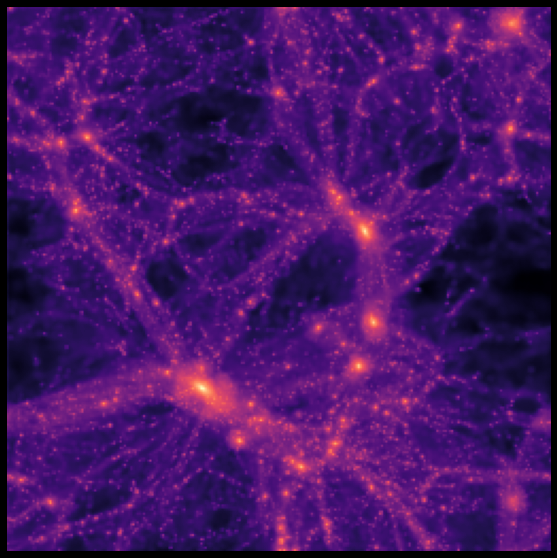

img.shape = (256, 256)
num of pixels = 65536


In [20]:
img = X.values[0].reshape((256, 256))

fig, ax = plt.subplots(figsize=(10, 10),
                       facecolor='black')
ax.axis('off')
ax.imshow(np.log10(img), cmap="magma")
plt.show()
print(f"{img.shape = }")
print(f"num of pixels = {img.size}")

### Mixed dataset

Data of 891 Titanic passengers.

In [21]:
X = pd.read_csv("http://patbaa.web.elte.hu/physdm/data/titanic.csv")

In [22]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


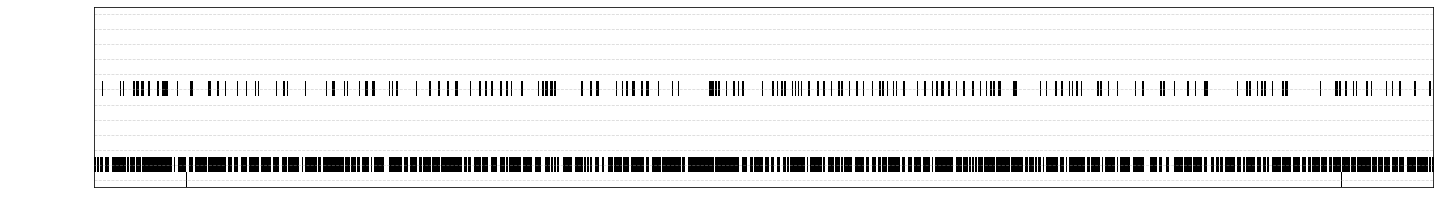

In [23]:
fig, ax = plt.subplots(figsize=(24, 24))#, facecolor='black')

# Determine the image extent and axis limits for dear Mr. Matplotlib
x_lim = (0, X.values.shape[0]-1)
y_lim = [-0.5, X.values.shape[1]-0.5]

ax.imshow(X.isna().values.T,
          extent=(x_lim[0], x_lim[-1], y_lim[0], y_lim[-1]),
          aspect=10, cmap="Greys", interpolation='none')

# Y-AXIS FORMATTING
ax.set_yticks(range(X.columns.size))
ax.set_yticklabels(X.columns[::-1], ha='right')
ax.tick_params(axis='both', which='major',
               labelsize=12, pad=10, colors='white')

ax.grid(True, axis='y', ls='--', alpha=0.5)

plt.show()

**This dataset needs some preprocessing!**

### A completely different type of problem

In [24]:
fasta = "MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH"
print(fasta)

MAAHKGAEHHHKAAEHHEQAAKHHHAAAEHHEKGEHEQAAHHADTAYAHHKHAEEHAAQAAKHDAEHHAPKPH


<img src="./images/alphafold.png"/></img>

# How to approach and handle a problem in data science?

Most of the problems should be approached and treated similarly by following these simple steps:
- Step 1.: Preprocess the dataset for analysis
- Step 2.: Find, tune and fit a model or models on the preprocessed dataset
- Step 3.: Make predictions using the trained model and evaluate and interpret the results

<img src="./images/pipeline-full.png"/></img>

# Preprocessing

A lot of beginner machine learning/data science guide for specific datasets will tell you to work with the data in a very specific way without actually telling you **why** should you do it **that** way? Why *scaling* the data is necessary? Why should you use *hot encoding*? What else can be done about missing data entries besides simply dropping them?

## 1.0. Every preprocessing starts with data exploration

### Why?

In [26]:
X = pd.read_csv('./data/Anscombe_quartet_data.csv')

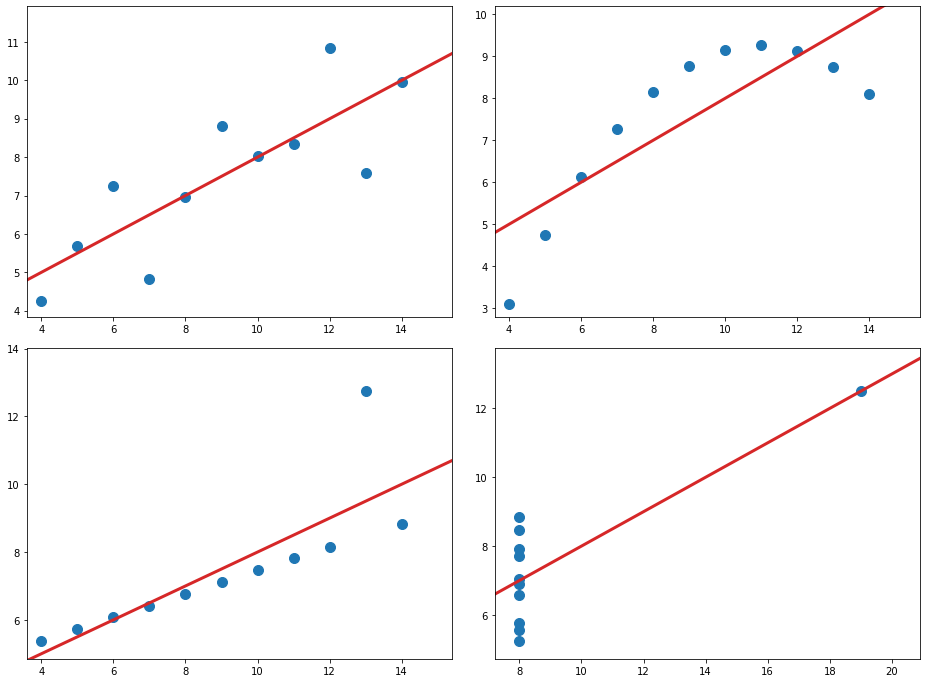

In [40]:
nr, nc = 2, 2
fig, axes = plt.subplots(nr, nc, figsize=(8*nc, 6*nr))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

sc = 10
Xs = [X['x123'], X['x123'], X['x123'], X['x4']]
ys = [X['y1'], X['y2'], X['y3'], X['y4']]

for i, ax in enumerate(axes.flat):
  ax.scatter(Xs[i], ys[i], s=sc**2)
  xi = np.linspace(-10, 25)
  yi = 1/2 * xi + 3.0
  ax.plot(xi, yi,
          color='tab:red', lw=3)
  ax.set_xlim(0.9 * np.min(Xs[i]), 1.1 * np.max(Xs[i]))
  ax.set_ylim(0.9 * np.min(ys[i]), 1.1 * np.max(ys[i]))

plt.show()

#### 1.0.1. Looking at the data

In [17]:
X = pd.read_csv("http://patbaa.web.elte.hu/physdm/data/titanic.csv")

In [18]:
X

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1.0.2. Exploring missing datapoints

In [23]:
X.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

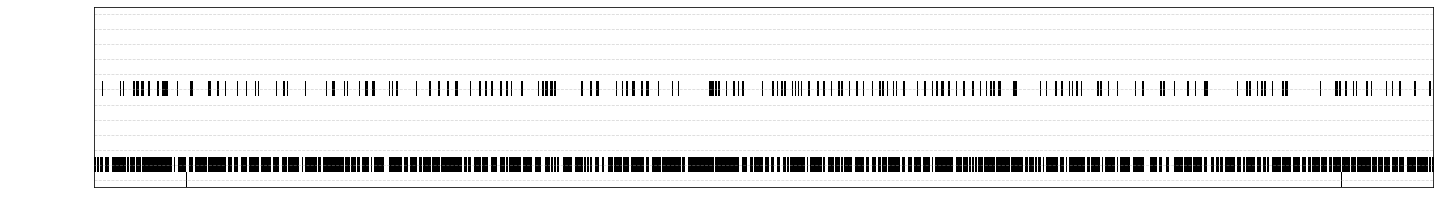

In [19]:
fig, ax = plt.subplots(figsize=(24, 24))#, facecolor='black')

# Determine the image extent and axis limits for dear Mr. Matplotlib
x_lim = (0, X.values.shape[0]-1)
y_lim = [-0.5, X.values.shape[1]-0.5]

ax.imshow(X.isna().values.T,
          extent=(x_lim[0], x_lim[-1], y_lim[0], y_lim[-1]),
          aspect=10, cmap="Greys", interpolation='none')

# Y-AXIS FORMATTING
ax.set_yticks(range(X.columns.size))
ax.set_yticklabels(X.columns[::-1], ha='right')
ax.tick_params(axis='both', which='major',
               labelsize=12, pad=10, colors='white')

ax.grid(True, axis='y', ls='--', alpha=0.5)

plt.show()

### 1.0.3. Exploring datatypes in the dataset

Object? Int? Float? Other?

In [21]:
# The `dtypes` variable of a pandas DataFrame object stores the datatypes
# of the columns in a specific DataFrame object
X.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 1.0.4. Exploring distribution of feature values

Explore a randomly generated classification dataset with 2 distinct classes and 8 features.

In [72]:
X, y = make_classification(
    n_samples=200,
    n_features=8,
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=0,
)
X = pd.DataFrame(X)

In [73]:
X

,0,1,2,3,4,5,6,7
0,1.095834,2.449157,2.117158,2.416923,-1.469534,-1.374239,1.119298,-1.730800
1,-1.651606,-0.454226,2.462629,1.510323,-1.234996,1.370949,-0.667642,0.168284
2,-1.344189,2.660052,1.325834,2.354723,-1.785008,0.336534,2.033347,-0.752887
3,0.663762,-0.626776,1.250835,0.998145,-1.402255,-0.062834,-1.254043,-0.748892
4,1.333327,-1.258959,-1.152103,-0.036520,-1.652254,-0.059189,-0.563567,0.908376
...,...,...,...,...,...,...,...,...
195,-0.653702,1.700572,-0.003157,2.710714,-4.147411,-0.297603,1.792878,0.159222
196,-0.036568,1.663468,-0.531393,0.905320,-1.166569,0.966177,1.011101,-1.171591
197,-1.500235,4.328224,2.510569,1.784081,1.294141,0.077245,2.459063,-2.551663
198,-0.070148,4.377034,2.916036,2.862933,-0.444110,1.560453,2.509889,-2.456509


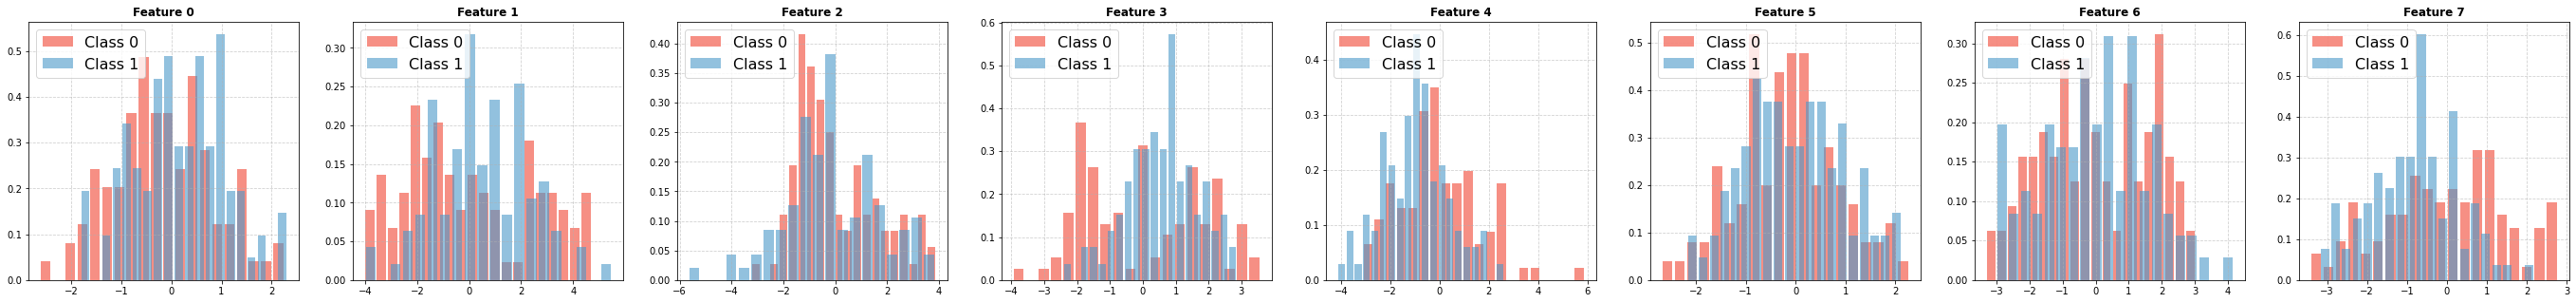

In [98]:
nc, nr = 8, 1
fig, axes = plt.subplots(nr, nc, figsize=(6*nc, 5*nr))

mask = np.bool_(y)
data = [X[mask], X[~mask]]
cmap = [cm.Reds, cm.Blues]
labl = ['Class 0', 'Class 1']
for d, c, l in zip(data, cmap, labl):
  for i, ax in enumerate(axes.flat):
    ax.grid(True, ls='--', alpha=0.6)
    
    # Convention for plotting numpy.histogram results
    hist, bins = np.histogram(d.values[:, i], bins=20, density=True)
    width = 0.8 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    ax.bar(center, hist, width=width, label=l,
           color=c(0.6), alpha=0.6)

    ax.set_title(f"Feature {i}", fontsize=12, fontweight='bold')
    ax.legend(loc='upper left', fontsize=16)

plt.show()

### 1.0.5. Exploring the correlation of features

In [45]:
X, y = make_classification(
    n_samples=100,    # Number of points in the data set
    n_features=6,     # Number of features in the data set
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=0,
)

In [46]:
pd.DataFrame(X)

,0,1,2,3,4,5
0,0.808420,-1.364420,0.776968,-1.269014,-2.836504,1.849303
1,-0.273098,-0.761866,0.900795,-0.225594,-1.607110,0.220950
2,-1.765465,-0.130839,1.153103,2.031923,-0.255405,-1.833182
3,0.963899,0.168924,-1.043183,-1.288018,0.219532,1.205638
4,-2.772058,1.283198,-0.518889,-1.402492,1.810782,-2.951798
...,...,...,...,...,...,...
95,0.894151,-0.200826,-2.198534,-2.391156,-1.140951,2.693488
96,1.077509,-0.391313,1.120537,-1.540448,-0.421118,0.317185
97,1.099777,-0.871377,-0.223813,-2.780917,-2.083206,2.177634
98,2.651271,0.758715,-1.519887,0.349809,2.154355,1.632513


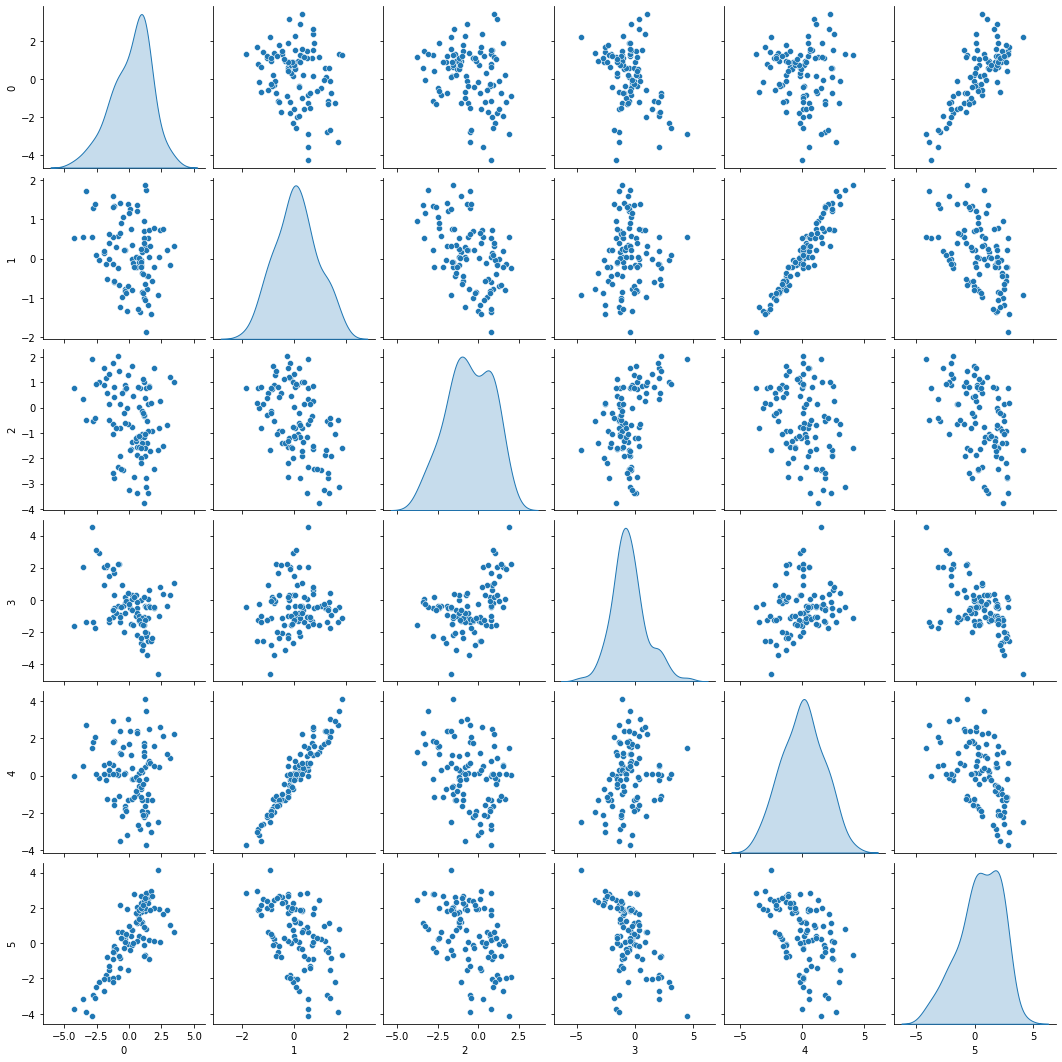

In [47]:
sns.pairplot(
  pd.DataFrame(X),
  kind='scatter',
  diag_kind='kde'
)

plt.show()

## 1.1. Handling missing data

### 1.1.1. Deleting rows or columns with too much NaN values

- Rows with too much missing values cannot be filled up in a meaningful way
- It's better to simply drop rows or columns with too many missing values

### 1.1.2. Filling empty entries with values

- Filling NaN entries with mean of existing values
- Filling NaN entries with values sampled from the distribution of existing ones

## 1.2. Handling non-numeric data

- Label encoding and one-hot encoding
- Do nothing with them in case of numerous tree ensemble methods (eg. TabNet)

## 1.3. Scaling

In [42]:
from sklearn.preprocessing import StandardScaler, Normalizer, \
                                  LabelEncoder, OneHotEncoder

In [59]:
X = np.load('/home/masterdesky/data/CAMELS/2D_maps/data/Maps_Mtot_Nbody_IllustrisTNG_CV_z=0.00.npy')
X = X.reshape((-1, 256**2))
X = pd.DataFrame(X)

In [61]:
X

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,6.296196e+11,6.007568e+12,1.784969e+12,3.243300e+11,2.074762e+11,1.442952e+11,1.411364e+11,1.522190e+11,1.395841e+11,1.285085e+11,...,2.945818e+11,1.835242e+11,2.094577e+11,1.907717e+11,1.543608e+11,9.952748e+10,7.832949e+10,8.524067e+10,1.215430e+11,1.482967e+11
1,1.921554e+11,2.563154e+11,3.361066e+11,4.953734e+11,2.629036e+11,1.763797e+11,1.343011e+11,1.288380e+11,1.275897e+11,1.307945e+11,...,7.077392e+10,7.263574e+10,9.588679e+10,1.489343e+11,1.943479e+11,1.526484e+11,1.054400e+11,8.429518e+10,8.113043e+10,7.492280e+10
2,3.585501e+11,2.917861e+11,1.946846e+11,1.994034e+11,2.621497e+11,2.632000e+11,1.775105e+11,2.094810e+11,1.942518e+11,1.507343e+11,...,4.709594e+10,3.921044e+10,3.802343e+10,3.880593e+10,3.726156e+10,3.558656e+10,4.137485e+10,5.461439e+10,6.784355e+10,7.224816e+10
3,1.150729e+11,1.063335e+11,5.703434e+10,5.047232e+10,5.414416e+10,5.924985e+10,6.244510e+10,5.970626e+10,5.672466e+10,5.445245e+10,...,4.230575e+10,4.493162e+10,4.606067e+10,4.891800e+10,5.374541e+10,9.764771e+10,2.265891e+11,1.066473e+11,8.156394e+10,6.239695e+10
4,1.074206e+11,9.236297e+10,1.062371e+11,1.971013e+11,3.723630e+11,9.323644e+10,7.674585e+10,7.536882e+10,8.276443e+10,7.773191e+10,...,8.979274e+10,9.140725e+10,9.030912e+10,8.586396e+10,7.883203e+10,6.506696e+10,5.397355e+10,4.722549e+10,4.677763e+10,5.100305e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,4.685320e+10,4.161717e+10,5.042337e+10,8.975735e+10,1.030622e+11,9.200413e+10,9.989119e+10,1.112507e+11,1.129722e+11,1.152391e+11,...,4.036539e+11,1.679382e+11,1.017114e+11,5.123339e+10,3.734238e+10,3.496658e+10,3.424788e+10,3.228061e+10,2.831820e+10,2.330908e+10
401,5.222602e+11,4.125289e+11,2.900626e+11,4.155187e+11,4.533484e+11,4.105571e+11,4.343466e+11,3.630505e+11,3.293631e+11,5.127443e+11,...,1.515119e+11,1.010676e+11,7.826276e+10,7.393643e+10,7.852819e+10,7.082318e+10,5.939451e+10,6.290425e+10,6.796932e+10,7.945867e+10
402,3.171218e+11,1.843182e+11,1.418921e+11,1.165651e+11,1.153857e+11,1.233530e+11,1.454219e+11,1.587802e+11,1.682794e+11,1.760137e+11,...,1.290560e+12,3.663084e+12,9.201300e+11,3.157533e+12,1.717919e+12,1.292460e+13,1.473122e+13,1.746981e+12,6.174121e+11,3.725937e+11
403,9.416073e+10,6.981387e+10,7.075296e+10,7.258460e+10,7.306858e+10,7.438877e+10,8.669580e+10,1.077775e+11,1.288063e+11,1.598657e+11,...,2.249686e+10,2.240748e+10,2.264783e+10,2.419081e+10,2.616559e+10,3.024530e+10,3.354699e+10,3.577197e+10,3.454428e+10,3.357247e+10


### Machine learning algorithms don't like values all over the scale!

#### StandardScaler

In [62]:
Xs = StandardScaler().fit_transform(X)

In [64]:
pd.DataFrame(Xs)

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,-0.018088,1.651361,0.483784,-0.063379,-0.086895,-0.165416,-0.209072,-0.206299,-0.224773,-0.177498,...,-0.066448,-0.112737,-0.097995,-0.139982,-0.113010,-0.187141,-0.190099,-0.209295,-0.163131,-0.123071
1,-0.129521,-0.087996,-0.058407,0.003120,-0.074230,-0.144359,-0.215526,-0.235144,-0.238975,-0.175889,...,-0.119581,-0.170995,-0.206859,-0.169366,-0.097934,-0.142935,-0.171654,-0.210142,-0.189493,-0.150925
2,-0.087136,-0.077268,-0.111330,-0.111948,-0.074403,-0.087381,-0.174729,-0.135654,-0.160045,-0.161853,...,-0.125202,-0.188556,-0.262324,-0.246714,-0.157159,-0.240350,-0.215241,-0.236734,-0.198160,-0.151941
3,-0.149155,-0.133355,-0.162841,-0.169850,-0.121929,-0.221230,-0.283370,-0.320433,-0.322881,-0.229629,...,-0.126339,-0.185550,-0.254620,-0.239612,-0.150944,-0.188705,-0.089229,-0.190117,-0.189210,-0.155680
4,-0.151105,-0.137580,-0.144429,-0.112843,-0.049221,-0.198925,-0.269868,-0.301110,-0.292050,-0.213242,...,-0.115066,-0.161133,-0.212205,-0.213663,-0.141486,-0.215818,-0.206669,-0.243354,-0.211902,-0.160006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,-0.166533,-0.152927,-0.165315,-0.154577,-0.110752,-0.199733,-0.248015,-0.256842,-0.256283,-0.186839,...,-0.040554,-0.120926,-0.201275,-0.237986,-0.157128,-0.240866,-0.220090,-0.256743,-0.223944,-0.170519
401,-0.045435,-0.040752,-0.075638,-0.027926,-0.030717,0.009327,0.067766,0.053806,-0.000069,0.092981,...,-0.100413,-0.156058,-0.223752,-0.222040,-0.141600,-0.211028,-0.202981,-0.229307,-0.198078,-0.149203
402,-0.097689,-0.109770,-0.131086,-0.144154,-0.107936,-0.179160,-0.205026,-0.198204,-0.190797,-0.144058,...,0.170001,1.715325,0.583224,1.943702,0.476482,10.485457,9.779111,1.279482,0.160335,-0.037922
403,-0.154482,-0.144400,-0.157708,-0.161253,-0.117605,-0.211294,-0.260473,-0.261127,-0.237535,-0.155425,...,-0.131042,-0.197384,-0.277062,-0.256979,-0.161342,-0.244795,-0.220567,-0.253615,-0.219882,-0.166623


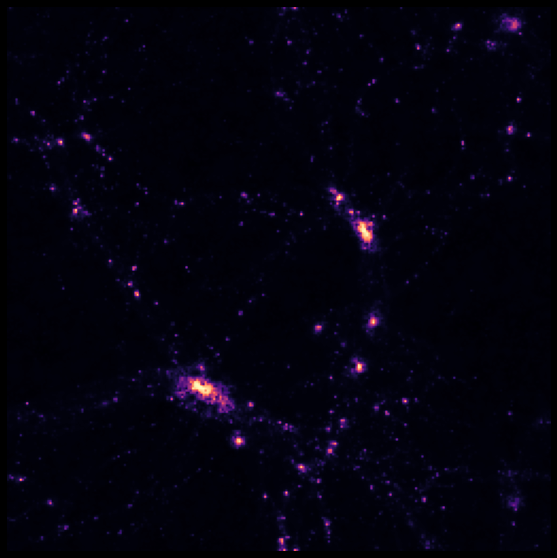

img.shape = (256, 256)
num of pixels = 65536


In [67]:
img = Xs[0].reshape((256, 256))

fig, ax = plt.subplots(figsize=(10, 10),
                       facecolor='black')
ax.axis('off')
ax.imshow(img, cmap="magma")
plt.show()
print(f"{img.shape = }")
print(f"num of pixels = {img.size}")

#### Normalizer

In [68]:
Xs = Normalizer().fit_transform(X)

In [69]:
pd.DataFrame(Xs)

,0,1,2,3,4,5,6,7,8,9,...,65526,65527,65528,65529,65530,65531,65532,65533,65534,65535
0,0.000503,0.004795,0.001425,0.000259,0.000166,0.000115,0.000113,0.000121,0.000111,0.000103,...,0.000235,0.000146,0.000167,0.000152,0.000123,0.000079,0.000063,0.000068,0.000097,0.000118
1,0.000202,0.000270,0.000354,0.000522,0.000277,0.000186,0.000141,0.000136,0.000134,0.000138,...,0.000075,0.000077,0.000101,0.000157,0.000205,0.000161,0.000111,0.000089,0.000085,0.000079
2,0.000675,0.000549,0.000367,0.000375,0.000494,0.000496,0.000334,0.000394,0.000366,0.000284,...,0.000089,0.000074,0.000072,0.000073,0.000070,0.000067,0.000078,0.000103,0.000128,0.000136
3,0.000117,0.000108,0.000058,0.000051,0.000055,0.000060,0.000063,0.000061,0.000058,0.000055,...,0.000043,0.000046,0.000047,0.000050,0.000055,0.000099,0.000230,0.000108,0.000083,0.000063
4,0.000195,0.000168,0.000193,0.000358,0.000676,0.000169,0.000139,0.000137,0.000150,0.000141,...,0.000163,0.000166,0.000164,0.000156,0.000143,0.000118,0.000098,0.000086,0.000085,0.000093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.000057,0.000051,0.000062,0.000110,0.000126,0.000112,0.000122,0.000136,0.000138,0.000141,...,0.000494,0.000205,0.000124,0.000063,0.000046,0.000043,0.000042,0.000039,0.000035,0.000028
401,0.000553,0.000437,0.000307,0.000440,0.000480,0.000435,0.000460,0.000384,0.000349,0.000543,...,0.000160,0.000107,0.000083,0.000078,0.000083,0.000075,0.000063,0.000067,0.000072,0.000084
402,0.000255,0.000148,0.000114,0.000094,0.000093,0.000099,0.000117,0.000128,0.000135,0.000142,...,0.001039,0.002949,0.000741,0.002542,0.001383,0.010405,0.011859,0.001406,0.000497,0.000300
403,0.000156,0.000116,0.000117,0.000121,0.000121,0.000124,0.000144,0.000179,0.000214,0.000265,...,0.000037,0.000037,0.000038,0.000040,0.000043,0.000050,0.000056,0.000059,0.000057,0.000056


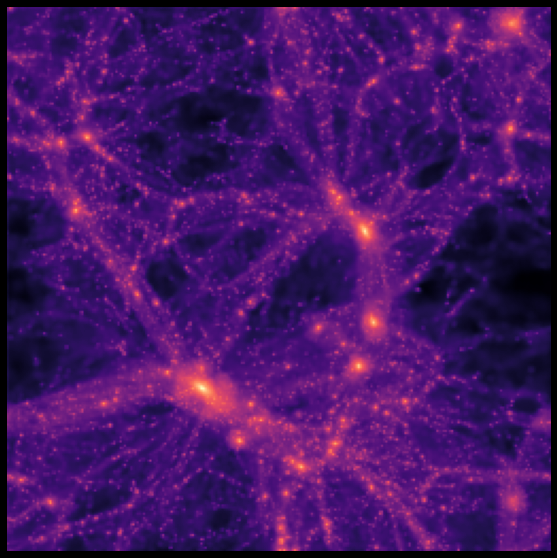

img.shape = (256, 256)
num of pixels = 65536


In [71]:
img = Xs[0].reshape((256, 256))

fig, ax = plt.subplots(figsize=(10, 10),
                       facecolor='black')
ax.axis('off')
ax.imshow(np.log10(img), cmap="magma")
plt.show()
print(f"{img.shape = }")
print(f"num of pixels = {img.size}")

### One-hot encoding

In [147]:
X, y = make_classification(
    n_samples=100,    # Number of points in the data set
    n_features=6,     # Number of features in the data set
    n_informative=4,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=0,
)
X = pd.DataFrame(X)

categories = ['Dog', 'Cat', 'Frog', 'Bear']
feat = np.random.choice(categories, size=100, replace=True)
X[5] = pd.Series(feat)

In [148]:
X

,0,1,2,3,4,5
0,0.808420,-1.364420,0.776968,-1.269014,-2.836504,Bear
1,-0.273098,-0.761866,0.900795,-0.225594,-1.607110,Cat
2,-1.765465,-0.130839,1.153103,2.031923,-0.255405,Cat
3,0.963899,0.168924,-1.043183,-1.288018,0.219532,Dog
4,-2.772058,1.283198,-0.518889,-1.402492,1.810782,Cat
...,...,...,...,...,...,...
95,0.894151,-0.200826,-2.198534,-2.391156,-1.140951,Bear
96,1.077509,-0.391313,1.120537,-1.540448,-0.421118,Frog
97,1.099777,-0.871377,-0.223813,-2.780917,-2.083206,Dog
98,2.651271,0.758715,-1.519887,0.349809,2.154355,Dog


In [152]:
Xenc = OneHotEncoder().fit_transform(X).toarray()

In [155]:
pd.DataFrame(Xenc)

,0,1,2,3,4,5,6,7,8,9,...,494,495,496,497,498,499,500,501,502,503
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 1.4. Dimensionality reduction

In [53]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [58]:
# Coexp...